# Apps Project

**This project compares Apple Store apps review to Google Play apps to determine which apps Store receives better reviews.**   

**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
# scipi is a library for statistical tests and visualizations 
from scipy import stats
# random enables us to generate random numbers
import random
import matplotlib.pyplot as plt

# Stage 1 - Sourcing and loading data

**1a. Loading the data**

The data from the Apple Store can be found [here](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) and the data from Google Store can be found [here](https://www.kaggle.com/lava18/google-play-store-apps)

In [2]:
#Loading the Google Store data
google = r'F:\Data Analysis\Springboard\Data Science Career Track\Projects\Apps Project\googleplaystore.csv'


Google = pd.read_csv(google)

# Using the head() pandas method, observe the first three entries.
Google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
#Loading the Apple Store data
apple = r'F:\Data Analysis\Springboard\Data Science Career Track\Projects\Apps Project\AppleStore.csv'

Apple = pd.read_csv(apple)

Apple.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [4]:
#Deleting the 'Unnamed: 0' column
del Apple['Unnamed: 0']

Apple.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [5]:
Google.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
Apple.columns

Index(['id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')

**1b. Picking the columns we'll work with**

From the columns of these datasets, we can infer that the most appropriate columns to use for the project are:

1. Google:
    * `Category`
    * `Rating`
    * `Reviews`
    * `Price`
2. Apple:    
    * `prime_genre`
    * `user_rating` 
    * `rating_count_tot`
    * `price`

**1c. Picking (Subsetting) the columns accordingly**

In [7]:
# Subset our DataFrame object Google by selecting just the variables ['Category', 'Rating', 'Reviews', 'Price']
Google = Google[['Category', 'Rating', 'Reviews', 'Price']]

Google.head()

,Category,Rating,Reviews,Price
0,ART_AND_DESIGN,4.1,159,0
1,ART_AND_DESIGN,3.9,967,0
2,ART_AND_DESIGN,4.7,87510,0
3,ART_AND_DESIGN,4.5,215644,0
4,ART_AND_DESIGN,4.3,967,0


In [8]:
# Selecting just the variables ['prime_genre', 'user_rating', 'rating_count_tot', 'price']
Apple = Apple[['prime_genre', 'user_rating', 'rating_count_tot', 'price']]

Apple.head()

,prime_genre,user_rating,rating_count_tot,price
0,Games,4.0,21292,3.99
1,Productivity,4.0,161065,0.00
2,Weather,3.5,188583,0.00
3,Shopping,4.0,262241,0.00
4,Reference,4.5,985920,0.00


## Stage 2 -  Cleaning, transforming and visualizing

**2a. Checking the data types for both Apple and Google, and fix them**

In [9]:
Apple.dtypes

prime_genre          object
user_rating         float64
rating_count_tot      int64
price               float64
dtype: object

In [10]:
Google.dtypes

Category     object
Rating      float64
Reviews      object
Price        object
dtype: object

The data type for the column Google 'Price' is 'object', not a numeric data type like a float or an integer. Let's investigate the unique values of this column and convert it to float just like we have Price as float in the Apple data

In [11]:
# Checking its unique values. 
Google['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

There are actually two issues here in the Price: 

- Firstly, there's a price called `Everyone`. 
- Secondly, there are `dollar` symbols.

Let's address both issues.

In [13]:
#Getting rid of the "Everyone" Price
Google = Google[Google['Price'] != 'Everyone']

# Check again the unique values of Google
Google['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

Getting rid of the $ symbols in the Price

In [18]:
#Getting rid of the $ symbol
nosymb = Google['Price'].replace('$','')


Google['Price'] = pd.to_numeric(nosymb)

Verifying that the 'Price' column really is numeric now.

In [19]:
Google.dtypes

Category     object
Rating      float64
Reviews      object
Price       float64
dtype: object

Let's change the column `Reviews` from object to float too.

In [20]:
Google['Reviews'] = pd.to_numeric(Google['Reviews'])

In [21]:
Google.dtypes

Category     object
Rating      float64
Reviews       int64
Price       float64
dtype: object

**2b. Creating a new coloumn called  `platform`  to both the `Apple` and the `Google` dataframes**

The reason for making this column is so that we can ultimately join our Apple and Google data together, and actually test out some hypotheses to solve the project. 

In [22]:
Apple['platform'] = 'apple'
Google['platform'] = 'google'

**2c. Changing the column names to prepare for our join of the two datasets** 

We need to rename the columns of `Apple` so that they're the same as the ones of `Google`, or vice versa.

In this case, we're going to change the `Apple` columns names to the names of the `Google` columns. 

This is an important step to unify the two datasets!

In [23]:
# Creating a variable called old_names where I'll store the column names of the Apple dataframe. 
old_names = Apple.columns

# Create a variable called new_names where I'll store the column names of the Google dataframe. 
new_names = Google.columns

Apple = Apple.rename(columns = dict(zip(old_names,new_names)))

**2d. Joining the two datasets**

In [24]:
# Append Apple to Google. 
df = Google.append(Apple, ignore_index= True)

df.sample(12)

,Category,Rating,Reviews,Price,platform
5139,MEDICAL,5.0,1,0.00,google
17393,Games,3.5,953,4.99,apple
8297,FAMILY,4.3,267787,0.00,google
9849,PRODUCTIVITY,4.3,201718,0.00,google
7700,LIFESTYLE,3.8,2548,0.00,google
8695,FAMILY,4.3,694,0.00,google
3348,TOOLS,4.4,4934130,0.00,google
10608,LIFESTYLE,5.0,33,0.00,google
17803,Games,4.5,102,0.00,apple
12021,Games,4.0,646,2.99,apple


**2e. Eliminate the NaN values**

In [25]:
df =  df.dropna()

print(df.shape)

(16563, 5)


**2f. Filtering the data so that we only see whose apps that have been reviewed**

In [26]:
df[df['Reviews'] == 0].count()

Category    929
Rating      929
Reviews     929
Price       929
platform    929
dtype: int64

929 apps do not have reviews, we need to eliminate these points!

In [27]:
# Eliminate the points that have 0 reviews.
df = df[df['Reviews'] != 0]

### 2g. Summarize the data visually and analytically (by the column `platform`)

What we need to solve our brief is a summary of the `Rating` column, but separated by the different platforms.

In [28]:
# To summarize analytically, we use the groupby() method on our df.
df.groupby(by='platform')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.049697,0.726943,1.0,4.0,4.5,4.5,5.0
google,9366.0,4.191757,0.515219,1.0,4.0,4.3,4.5,5.0


Let's also get a **visual summary** of the `Rating` column, separated by the different platforms. 

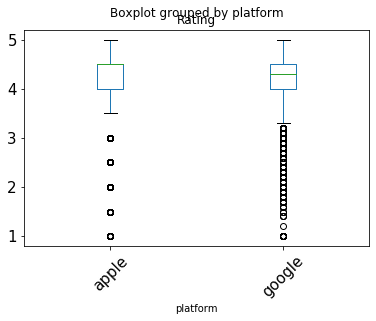

In [29]:
df.boxplot( by='platform', column = ['Rating'], grid=False, rot=45, fontsize=15)

## Stage 3 - Modelling

**3a. Hypothesis formulation**

The **Null hypothesis** is just:

**H<sub>null</sub>**: the observed difference in the mean rating of Apple Store and Google Play apps is due to chance (and thus not due to the platform).


**H<sub>alternative</sub>**: the observed difference in the average ratings of apple and google users is not due to chance (and is actually due to platform)

**3b. Getting the distribution of the data**

In [30]:
apple = df[df['platform'] == 'apple']['Rating']
google = df[df['platform']== 'google']['Rating']

In [31]:
# Since the null hypothesis of the normaltest() is that the data is normally distributed, the lower the p-value in the result of this test, the more likely the data are to be normally distributed.
apple_normal = stats.normaltest(apple)
print(apple_normal)

NormaltestResult(statistic=1778.9974234584017, pvalue=0.0)


In [32]:
# Do the same with the google data. 
google_normal = stats.normaltest(google)
print(google_normal)

NormaltestResult(statistic=3678.6157187516856, pvalue=0.0)


Since the null hypothesis of the normaltest() is that the data are normally distributed, the lower the p-value in the result of this test, the more likely the data are to be non-normal. 

Since the p-values is 0 for both tests, regardless of what we pick for the significance level, our conclusion is that the data are not normally distributed. 

We can actually also check out the distribution of the data visually with a histogram. A normal distribution has the following visual characteristics:
    - symmetric
    - unimodal (one hump)

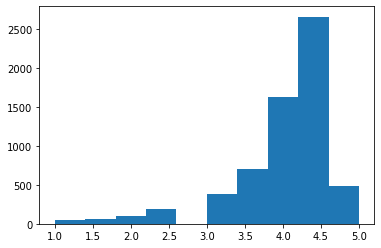

In [33]:
# Create a histogram of the apple reviews distribution
histoApple = plt.hist(apple)

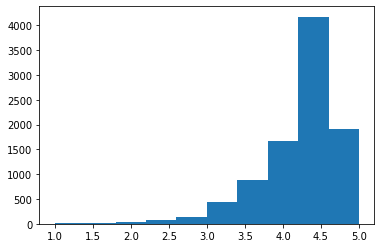

In [34]:
# Create a histogram of the google data
histoGoogle = plt.hist(google)

### 3c. Permutation test
Since the data aren't normally distributed, we're using a *non-parametric* test here. This is simply a label for statistical tests used when the data aren't normally distributed. These tests are extraordinarily powerful due to how few assumptions we need to make. 

In [35]:
# Create a column called `Permutation1`, and assign to it the result of permuting (shuffling) the Rating column
df['Permutation1'] = np.random.permutation(df['Rating'])

df.groupby(by='platform')['Permutation1'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.139438,0.603874,1.0,4.0,4.3,4.5,5.0
google,9366.0,4.131700,0.618967,1.0,4.0,4.3,4.5,5.0


In [36]:
# Let's compare with the previous analytical summary
df.groupby(by='platform')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.049697,0.726943,1.0,4.0,4.5,4.5,5.0
google,9366.0,4.191757,0.515219,1.0,4.0,4.3,4.5,5.0


The difference in the means for Permutation1 (4.139438 - 4.131700 = 0.007738) now looks different to our observed difference of 4.191757 - 4.049697 = 0.14206. It's sure starting to look like our observed difference is significant, and that the Null Hypothesis is false; platform does impact on ratings

But to be sure, let's create 10,000 permutations, calculate the mean ratings for Google and Apple apps and the difference between these for each one, and then take the average of all of these differences.
Let's create a vector with the differences - that will be the distibution of the Null.

In [38]:
# First, make a list called difference.
difference = list()

# Now make a for loop that does the following 10,000 times:
for i in range(10000):
    permutation = np.random.permutation(df['Rating'])
    difference.append(np.mean(permutation[df['platform']=='apple']) - np.mean(permutation[df['platform']=='google']))

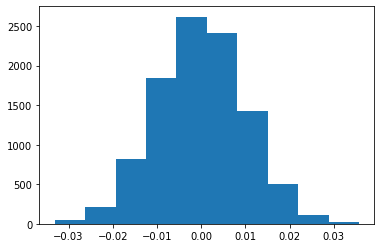

In [39]:
histo = plt.hist(difference)

In [40]:
# Now make a variable called obs_difference, and assign it the result of the mean of our 'apple' variable and the mean of our 'google variable'
obs_difference = np.mean(apple) - np.mean(google)

# Make this difference absolute with the built-in abs() function. 
obs_difference = abs(obs_difference)

obs_difference

0.14206054745123442

## Stage 4 -  Evaluating and concluding
### 4a. What is our conclusion?

The p-value of our observed data is just the proportion of the data given the null that's at least as extreme as that observed data. As a result, we're going to count how many of the differences in our difference list are at least as extreme as our observed difference. If less than or equal to 5% of them are, then we will reject the Null. 

In [41]:
positiveExtremes = []
negativeExtremes = []
for i in range(len(difference)):
    if (difference[i] >= obs_difference):
        positiveExtremes.append(difference[i])
    elif (difference[i] <= -obs_difference):
        negativeExtremes.append(difference[i])

print(len(positiveExtremes))
print(len(negativeExtremes))

0
0


**Conclusion**

Zero differences are at least as extreme as our observed difference. So the p-value of our observed data is 0. 

It doesn't matter which significance level we pick; our observed data is statistically significant, and we reject the Null.

We conclude that platform does impact on ratings. Specifically, we should advise our client to integrate **only Google Play** into their operating system interface.